<a href="https://colab.research.google.com/github/kabbo12012000/cifar10/blob/main/cifar10_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [5]:
x_train[0]
y_test[0]

array([3], dtype=uint8)

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train = (x_train/255-0.5)*2
x_test = (x_test/255-0.5)*2

In [9]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test= x_test.reshape(x_test.shape[0], -1)

In [10]:
unique_values , counts = np.unique(y_train, return_counts=True)

for value , count  in zip(unique_values , counts):
  print("Value: ", value, "Counts:", count)

Value:  0 Counts: 5000
Value:  1 Counts: 5000
Value:  2 Counts: 5000
Value:  3 Counts: 5000
Value:  4 Counts: 5000
Value:  5 Counts: 5000
Value:  6 Counts: 5000
Value:  7 Counts: 5000
Value:  8 Counts: 5000
Value:  9 Counts: 5000


In [14]:
model = models.Sequential([
    layers.Input(shape=(3072,)),

    layers.Dense(256),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=.01),
    layers.Dropout(0.5),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=.01),
    layers.Dropout(0.5),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=.01),
    layers.Dropout(0.5),
    layers.Dense(10 , activation='softmax')
])

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830,282 (3.17 MB)

 Trainable params: 829,386 (3.16 MB)

 Non-trainable params: 896 (3.50 KB)

In [16]:


history  = model.fit(x_train , y_train , epochs=20 , batch_size=64 , validation_split=0.1)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2029 - loss: 2.3112 - val_accuracy: 0.3684 - val_loss: 1.7631
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3173 - loss: 1.8743 - val_accuracy: 0.4010 - val_loss: 1.6659
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3546 - loss: 1.7914 - val_accuracy: 0.4278 - val_loss: 1.6083
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3687 - loss: 1.7521 - val_accuracy: 0.4358 - val_loss: 1.5671
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3863 - loss: 1.7084 - val_accuracy: 0.4610 - val_loss: 1.5301
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3999 - loss: 1.6757 - val_accuracy: 0.4676 - val_loss: 1.4973
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4106 - loss: 1.6467 - val_accuracy: 0.4776 - val_loss: 1.4800
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4175 - loss: 1.6277 - val_accuracy: 0

In [17]:
loss , acc = model.evaluate(x_test,y_test)
print(acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5197 - loss: 1.3460
51.75999999046326


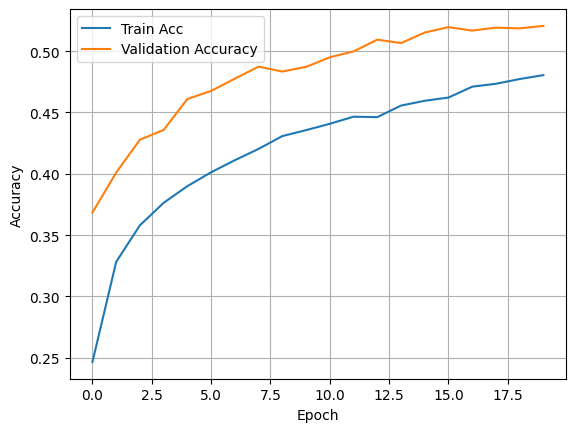

In [18]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

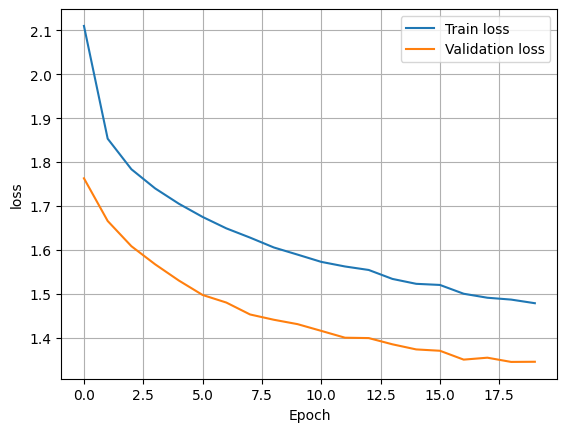

In [19]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
index = 5555 # @param {"type":"integer"}

single_image = x_test[index]
single_image_label = y_test[index]

single_image = single_image.reshape(1,3072)

prediction = model.predict(single_image)

print(prediction)

predicted_class = np.argmax(prediction[0])


print(single_image_label)
print(predicted_class)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
[[0.04333801 0.00194259 0.23710519 0.10611119 0.24113105 0.09207138
  0.22875395 0.03349132 0.01326481 0.00279047]]
[4]
4


# NOW TRY CNN

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,056 (9.49 MB)

 Trainable params: 829,386 (3.16 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 1,658,774 (6.33 MB)

In [30]:

history = cnn.fit(x_train , y_train , epochs =20, batch_size=64)

Epoch 1/20


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.